# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-11-24 23:00:00 +03:00`

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [3]:
reviews = pd.read_csv("reviews.tsv", sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [4]:
X = reviews["review"]
y = reviews["sentiment"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42, stratify=y)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and comapre them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [8]:
count_vectorizer = CountVectorizer()

X_train_0 = count_vectorizer.fit_transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 68482)


In [9]:
count_vectorizer = CountVectorizer()

X_train_0 = count_vectorizer.fit_transform(X_train)
X_test_0 = count_vectorizer.fit_transform(X_test)


print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 38591)


In [10]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


## Explanation
There are 3 approaches of computing CountVectorizer method. In each case we trained model for creating vocab (1 case: X_train vocab, 2 case: X_train vocab and X_test vocab, 3 case: X vocab). It means that we have created dictionaries where key is word and value is unique word number. After that we had aplied model to X_train and X_test depending on different cases and got a vector representation of each text where the value of each component is frequency of words that occur in the text and are in the dictionary. If the word is not in the dictionary, then value is 0.

So we have to train the CountVectorizerdel on X in order to have a complete representation of X_train and X_test and for them the same size for further tasks.

In [11]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


**Task 1.2 [0.5 point] - Sparse matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those?

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

In [12]:
type(X_train_0), type(X_test_0)

(scipy.sparse._csr.csr_matrix, scipy.sparse._csr.csr_matrix)

*Answer:* 

This is one the effective way for representation matrix with huge number of zeros (sparse matrix). We need it, because there are a lot of methods with matrix computition in ML where is commonly used linalg algorythms the complexity of which may be O(n^3). This way helps us to reduce the number of unintresing operations such as multiplying and adding a value by zero. And also it usually reduces the size of the occupied memory by the sparse matrix.

np.array is array that takes up more memory then it needs unlike a list that is usually used to represent sparse matrices. 
Methods of storing sparse matrices:
* Coordinate Matrix (COO) -- This variant uses three subarrays to store the element values and their coordinate positions.

* Dictionary of Keys Matrix (DOK) -- This is very much like COO except that it subclasses dict to store coordinate-data information as key-value 
pairs. Since it uses a hash table as storage, identifying values at any given location has constant lookup time.

* Linked List Matrix (LIL) -- LIL stores information in lil.rows where each list represents a row index and the elements inside the list match columns. In a parallel array, lil.data, the NNZ(Number of Non Zero) values are stored.

* Compressed Sparse Matrices (CSR, CSC) -- this formats are designed for computation in mind unlike the previous ones intended for storage.

* Others (BSR, DIA).

I have took information from this source: https://matteding.github.io/2019/04/25/sparse-matrices/

**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest missclassified objects. Why they were hard to classify? 


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [15]:
rf_model = RandomForestClassifier(n_estimators=500)
lr_model = LogisticRegression(max_iter=1e5)

**Training and comparing models fitting time**

In [16]:
time = tm.time()
rf_model.fit(X_train_0, y_train)
time_rf = tm.time() - time

time = tm.time()
lr_model.fit(X_train_0, y_train)
time_lr = tm.time() - time

print('Training time of models:\nRandom forest: {:.0f}s.\nLinear regression: {:.0f}s.'.format(time_rf, time_lr))

KeyboardInterrupt: 

**Comparing accuracy, precision and recall**

In [ ]:
metrics_rf = {'Accuracy': accuracy_score(y_test, rf_model.predict(X_test_0)),
              'Presicion': precision_score(y_test, rf_model.predict(X_test_0)),
              'Recall': recall_score(y_test, rf_model.predict(X_test_0)),
              'F1': f1_score(y_test, rf_model.predict(X_test_0))}

metrics_lr = {'Accuracy': accuracy_score(y_test, lr_model.predict(X_test_0)),
              'Presicion': precision_score(y_test, lr_model.predict(X_test_0)),
              'Recall': recall_score(y_test, lr_model.predict(X_test_0)),
              'F1': f1_score(y_test, lr_model.predict(X_test_0))}  

print(f"Accuracy:\nRandom forest: {metrics_rf['Accuracy']}\nLinear regression: {metrics_lr['Accuracy']}")
print(f"\nPresicion:\nRandom forest: {metrics_rf['Presicion']}\nLinear regression: {metrics_lr['Presicion']}")
print(f"\nRecall:\nRandom forest: {metrics_rf['Recall']}\nLinear regression: {metrics_lr['Recall']}")
print(f"\nF1:\nRandom forest: {metrics_rf['F1']}\nLinear regression: {metrics_lr['F1']}")

Accuracy:
Random forest: 0.8576
Linear regression: 0.8818

Presicion:
Random forest: 0.8451737451737452
Linear regression: 0.8756395120031484

Recall:
Random forest: 0.8756
Linear regression: 0.89

F1:
Random forest: 0.8601178781925344
Linear regression: 0.8827613568736361


**ROC-AUC study**

In [ ]:
def roc_auc_plotter(X_test_0, y_test, model1, model2):
    fpr_rf, tpr_rf, _ = roc_curve(y_test,  model1.predict_proba(X_test_0)[::,1])
    auc_rf = roc_auc_score(y_test, model1.predict_proba(X_test_0)[::,1])

    fpr_lr, tpr_lr, _ = roc_curve(y_test,  model2.predict_proba(X_test_0)[::,1])
    auc_lr = roc_auc_score(y_test, model2.predict_proba(X_test_0)[::,1])

    plt.plot(fpr_rf, tpr_rf, label='Random Forest, auc={:.5f}'.format(auc_rf))
    plt.plot(fpr_lr, tpr_lr, label='Linear Regression, auc={:.5f}'.format(auc_lr))
    plt.plot([0, 1], [0, 1], linestyle = '--', color='black')
    plt.legend(loc=4)
    plt.title('ROC curve and AUC score')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.show()

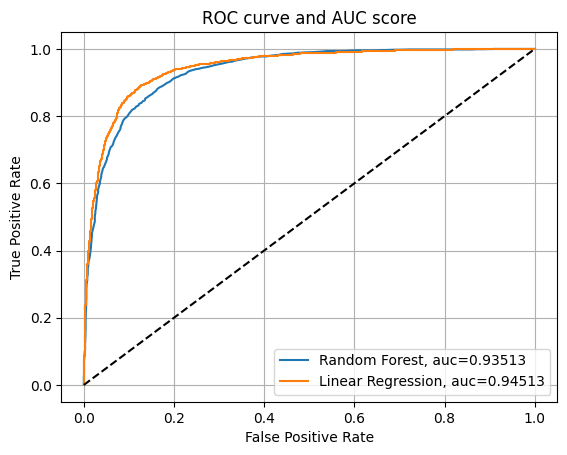

In [ ]:
roc_auc_plotter(X_test_0, y_test, rf_model, lr_model)

**Precision-Recall curve (F1 was calculated in first task)**

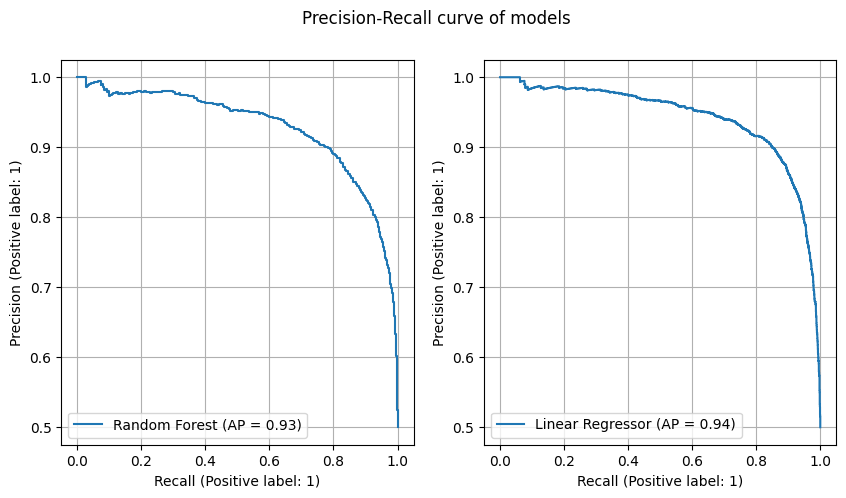

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Precision-Recall curve of models')
display_rf = PrecisionRecallDisplay.from_estimator(rf_model, X_test_0, y_test, name="Random Forest", ax=ax1)
display_lr = PrecisionRecallDisplay.from_estimator(lr_model, X_test_0, y_test, name="Linear Regressor", ax=ax2)
ax1.grid()
ax2.grid()

**Finding the trickiest missclassified objects**

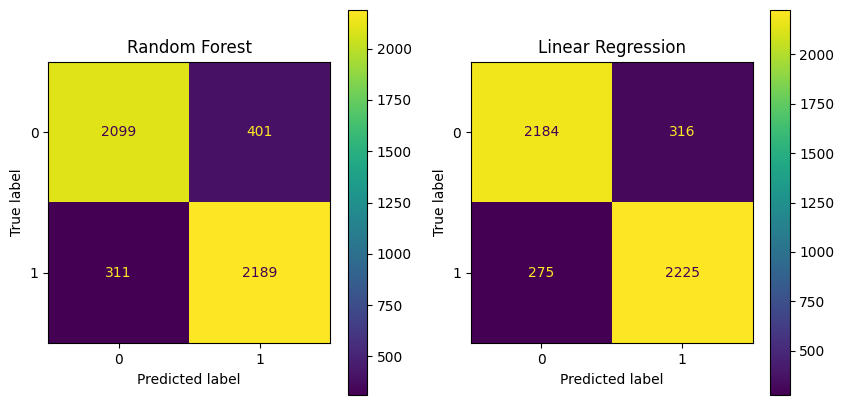

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_0, y_test, ax=ax1)
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_0, y_test, ax=ax2)
ax1.set_title('Random Forest')
ax2.set_title('Linear Regression')
plt.show()

In [ ]:
rf_pred_probs = rf_model.predict_proba(X_test_0)
lr_pred_probs = lr_model.predict_proba(X_test_0)

rf_probs_0 = rf_pred_probs[:, 1]
lr_probs_0 = lr_pred_probs[:, 1]

rf_neutral_objects = np.where((rf_probs_0 > .45) & (rf_probs_0 <.55))[0]
lr_neutral_objects = np.where((lr_probs_0 > .45) & (lr_probs_0 <.55))[0]

In [ ]:
lr_neutral_objects[0] in rf_neutral_objects

True

In [ ]:
X_test.to_numpy()[lr_neutral_objects[0]]

"I'm not to keen on The Pallbearer, it's not too bad, but just very slow at the times. As the movie goes on, it gets a little more interesting, but nothing brilliant. I really like David Schwimmer and I think he's good here. I'm not a massive Gwyneth Paltrow fan, but I don't mind her sometimes and she's okay here. The Pallbearer is not a highly recommended movie, but if you like the leads then you might enjoy it."

As for me, I have some problems to classificate the review to positive or negative. As, this is the neutral review.

Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

*Answer:* Linear Regressor. Because, sparse matrix of X_train_0 is very close to the content of linearly dependent rows or columns, since there are a lot of zeros and ones in the matrix. Therefore features can have a smooth, nearly linear dependence on the covariates, then linear regression will model the dependence better than random forest, which will basically approximate a linear curve with an irragular step function. I think if we trained Random Forest Classifier with bigger value of n_estimators than now, we will get a better metric, because it helps to approximate smooth dependencies.   

### More sophisticated feature preprocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [ ]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

**top-20 words in train set and test set**

In [ ]:
def count_words(set, stopwords=[]):
    temp = [word for word in ' '.join(set).lower().split() if word not in stopwords]
    cnt = Counter(temp)
    return cnt

cnt_train = count_words(X_train)
cnt_test = count_words(X_test)


In [ ]:
cnt_train.most_common(20)

[('the', 258391),
 ('a', 128084),
 ('and', 127297),
 ('of', 115800),
 ('to', 107320),
 ('is', 83586),
 ('in', 72324),
 ('i', 56484),
 ('this', 56012),
 ('that', 53230),
 ('it', 52534),
 ('/><br', 40824),
 ('was', 37699),
 ('as', 35966),
 ('with', 34382),
 ('for', 34298),
 ('but', 31753),
 ('on', 25516),
 ('movie', 24926),
 ('his', 23334)]

In [ ]:
cnt_test.most_common(20)

[('the', 63807),
 ('a', 31865),
 ('and', 31275),
 ('of', 28662),
 ('to', 26647),
 ('is', 20584),
 ('in', 18203),
 ('i', 13996),
 ('this', 13699),
 ('that', 13062),
 ('it', 12961),
 ('/><br', 10111),
 ('was', 9325),
 ('as', 9136),
 ('for', 8545),
 ('with', 8347),
 ('but', 8011),
 ('on', 6102),
 ('movie', 5953),
 ('not', 5750)]

Articles "a", "the", "The", "to", "as", "/><\br" are not so meaningful and occured 562452 times (in train set)

**Stopwords**

In [ ]:
nltk.download('stopwords')
stops = [*set(stopwords.words('english'))]
stops

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/litvan007/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['few',
 'were',
 'are',
 'by',
 'from',
 'under',
 'not',
 "you'd",
 'until',
 "wasn't",
 "you're",
 'and',
 'ours',
 'above',
 'mustn',
 "don't",
 'we',
 'my',
 'over',
 'can',
 'hasn',
 'd',
 'mightn',
 'own',
 'ain',
 "weren't",
 'about',
 'didn',
 'other',
 'couldn',
 'haven',
 'who',
 'aren',
 'doesn',
 'any',
 'him',
 'have',
 'does',
 'off',
 'while',
 'yours',
 'below',
 'o',
 'doing',
 'a',
 'into',
 'than',
 've',
 'this',
 'very',
 'y',
 'only',
 'her',
 'their',
 'it',
 'too',
 "shouldn't",
 'before',
 'where',
 'been',
 'some',
 'there',
 'hadn',
 'himself',
 'such',
 "haven't",
 'wasn',
 'she',
 'wouldn',
 'which',
 'shouldn',
 "won't",
 "that'll",
 'll',
 'to',
 'then',
 'was',
 'had',
 'how',
 "doesn't",
 'themselves',
 'am',
 'isn',
 'ma',
 'as',
 'all',
 "she's",
 'same',
 'its',
 'm',
 "you'll",
 "couldn't",
 'what',
 'you',
 'further',
 'once',
 'nor',
 'your',
 'an',
 'he',
 're',
 'but',
 "mustn't",
 'they',
 'me',
 'those',
 'here',
 'ourselves',
 "you've",
 'ag

Stop words are common words are very frequent in text, and so don’t convey insights into the specific topic of a text

In [ ]:
cnt_train_new = count_words(X_train, stopwords=stops+['/><br'])
cnt_test_new = count_words(X_test, stopwords=stops+['/><br'])

In [ ]:
cnt_train_new.most_common(20)

[('movie', 24926),
 ('film', 22347),
 ('one', 18119),
 ('like', 15066),
 ('even', 9693),
 ('would', 9602),
 ('good', 9434),
 ('really', 8895),
 ('see', 8390),
 ('-', 7494),
 ('get', 7115),
 ('much', 7077),
 ('story', 7014),
 ('also', 6448),
 ('first', 6400),
 ('time', 6379),
 ('people', 6215),
 ('great', 6151),
 ('make', 6066),
 ('could', 6054)]

In [ ]:
cnt_test_new.most_common(20)

[('movie', 5953),
 ('film', 5425),
 ('one', 4357),
 ('like', 3713),
 ('good', 2490),
 ('would', 2424),
 ('even', 2317),
 ('really', 2170),
 ('see', 2020),
 ('-', 1861),
 ('get', 1844),
 ('story', 1728),
 ('much', 1662),
 ('first', 1585),
 ('time', 1565),
 ('great', 1562),
 ('also', 1559),
 ('could', 1540),
 ('/>the', 1524),
 ('make', 1524)]

Now most of the most common words have more meaning than before

**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

Find positive comments (idx_pos) and negative comments (idx_neg)

In [ ]:
idx_pos = y_train[y_train == 1].index.to_numpy()
X_pos = X_train[idx_pos]

idx_neg = y_train[y_train == 0].index.to_numpy()
X_neg = X_train[idx_neg]

In [ ]:
cnt_pos = count_words(X_pos, stopwords=stops+['/><br']+['<br']+['&']+['/>the'])
cnt_neg = count_words(X_neg, stopwords=stops+['/><br']+['<br']+['&']+['/>the'])

We can see that there are different top-100 tokens:

In [ ]:
cnt_pos.most_common(100)

[('film', 11790),
 ('movie', 10956),
 ('one', 9412),
 ('like', 6728),
 ('good', 4787),
 ('great', 4407),
 ('see', 4345),
 ('really', 4207),
 ('would', 4203),
 ('story', 4058),
 ('also', 4004),
 ('-', 3809),
 ('even', 3761),
 ('much', 3445),
 ('first', 3338),
 ('get', 3294),
 ('time', 3202),
 ('well', 3091),
 ('best', 2991),
 ('people', 2944),
 ('many', 2900),
 ('love', 2866),
 ('two', 2734),
 ('think', 2721),
 ('made', 2590),
 ('never', 2563),
 ('little', 2561),
 ('make', 2527),
 ('could', 2475),
 ('still', 2395),
 ('way', 2331),
 ('seen', 2268),
 ('watch', 2210),
 ('films', 2184),
 ('characters', 2079),
 ('movies', 2078),
 ('character', 2075),
 ('it.', 2055),
 ('know', 2030),
 ('life', 1967),
 ('show', 1944),
 ('man', 1897),
 ('makes', 1893),
 ('ever', 1833),
 ('new', 1818),
 ('film,', 1785),
 ('film.', 1779),
 ('find', 1774),
 ('movie.', 1733),
 ('go', 1728),
 ('young', 1728),
 ('back', 1714),
 ('real', 1708),
 ('quite', 1623),
 ('years', 1599),
 ('better', 1580),
 ('scene', 1573),
 

In [ ]:
cnt_neg.most_common(100)

[('movie', 13970),
 ('film', 10557),
 ('one', 8707),
 ('like', 8338),
 ('even', 5932),
 ('would', 5399),
 ('really', 4688),
 ('good', 4647),
 ('bad', 4253),
 ('see', 4045),
 ('get', 3821),
 ('-', 3685),
 ('much', 3632),
 ('could', 3579),
 ('make', 3539),
 ('people', 3271),
 ('time', 3177),
 ('made', 3076),
 ('first', 3062),
 ('story', 2956),
 ('think', 2711),
 ('never', 2570),
 ('also', 2444),
 ('plot', 2410),
 ('movie.', 2372),
 ('watch', 2338),
 ('little', 2321),
 ('know', 2301),
 ('acting', 2297),
 ('way', 2282),
 ('ever', 2258),
 ('two', 2233),
 ('many', 2233),
 ('movies', 2222),
 ('it.', 2185),
 ('character', 2143),
 ('characters', 2129),
 ('nothing', 2119),
 ('better', 2055),
 ('seen', 2029),
 ("i'm", 2026),
 ('something', 1990),
 ('say', 1982),
 ('go', 1976),
 ('watching', 1898),
 ('thing', 1797),
 ('actually', 1792),
 ('worst', 1777),
 ('movie,', 1755),
 ('great', 1744),
 ('films', 1738),
 ('scene', 1720),
 ('film.', 1711),
 ('going', 1707),
 ('show', 1696),
 ('want', 1647),
 (

Let's plot the last 15 tokens in the top 100 tokens for positive comments and the first 15 tokens in the top 100 tokens for negative comments

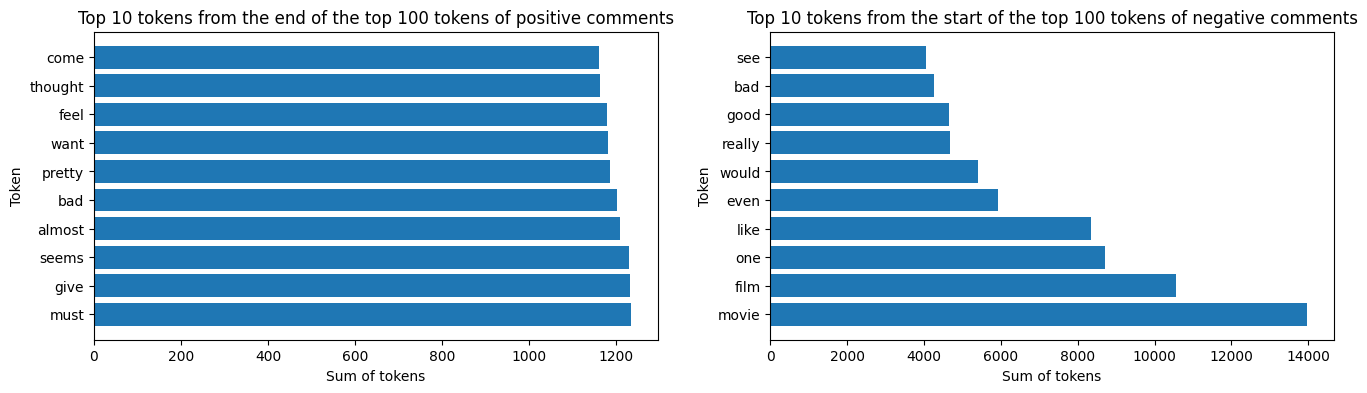

In [ ]:
temp_pos = dict(cnt_pos.most_common(100))
temp_neg = dict(cnt_neg.most_common(100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.barh(list(temp_pos.keys())[90:], list(temp_pos.values())[90:])
ax1.set_title('Top 10 tokens from the end of the top 100 tokens of positive comments')
ax1.set_xlabel('Sum of tokens')
ax1.set_ylabel('Token')

ax2.barh(list(temp_neg.keys())[:10], list(temp_neg.values())[:10])
ax2.set_title('Top 10 tokens from the start of the top 100 tokens of negative comments')
ax2.set_xlabel('Sum of tokens')
ax2.set_ylabel('Token')

plt.show()

We see that the word 'bad' in negative comments occurs more often than in positive comments. Similarly, it can be shown that the word 'good' occurs more often in positive comments than in negative ones

*Answer:* Yes, it will be different

**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

**CounterVectorizer**

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=15000)
count_vectorizer.fit(X)
X_train_vec = count_vectorizer.transform(X_train)
X_test_vec = count_vectorizer.transform(X_test)

print(X_train_vec.shape, X_test_vec.shape)

(20000, 15000) (5000, 15000)


In [ ]:
rf_model_vec = RandomForestClassifier(n_estimators=500)
lr_model_vec = LogisticRegression(max_iter=1e5)

rf_model_vec.fit(X_train_vec, y_train)
lr_model_vec.fit(X_train_vec, y_train)

LogisticRegression(max_iter=100000.0)

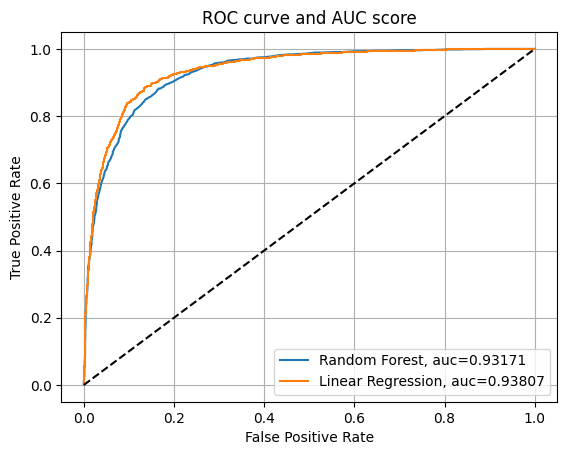

In [ ]:
roc_auc_plotter(X_test_vec, y_test, rf_model_vec, lr_model_vec)

**HashingVectorizer**

In [ ]:
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
hash_vectorizer.fit(X)
X_train_hash = hash_vectorizer.transform(X_train)
X_test_hash = hash_vectorizer.transform(X_test)

print(X_train_hash.shape, X_test_hash.shape)

(20000, 15000) (5000, 15000)


In [ ]:
rf_model_hash = RandomForestClassifier(n_estimators=500)
lr_model_hash = LogisticRegression(max_iter=1e5)

rf_model_hash.fit(X_train_hash, y_train)
lr_model_hash.fit(X_train_hash, y_train)

LogisticRegression(max_iter=100000.0)

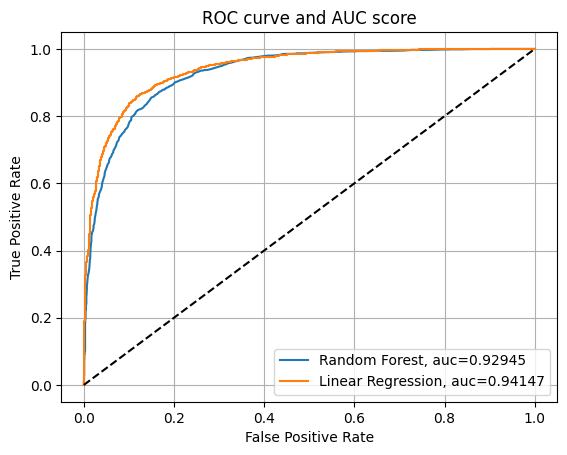

In [ ]:
roc_auc_plotter(X_test_hash, y_test, rf_model_hash, lr_model_hash)

**Top 15k tokens from previously trained Random Forest**

In [ ]:
important_features_top15000 = np.argpartition(rf_model.feature_importances_, -15000)[-15000:]

In [ ]:
important_features_top15000

array([60440, 51860, 19178, ..., 58288, 33069,     0])

In [ ]:
count_vectorizer_imp = CountVectorizer()
count_vectorizer_imp.fit(X)
X_train_imp = count_vectorizer_imp.transform(X_train)[:, important_features_top15000]
X_test_imp = count_vectorizer_imp.transform(X_test)[:, important_features_top15000]

print(X_train_imp.shape, X_test_imp.shape)

(20000, 15000) (5000, 15000)


In [ ]:
rf_model_imp = RandomForestClassifier(n_estimators=500)
lr_model_imp = LogisticRegression(max_iter=1e5)

rf_model_imp.fit(X_train_imp, y_train)
lr_model_imp.fit(X_train_imp, y_train)

LogisticRegression(max_iter=100000.0)

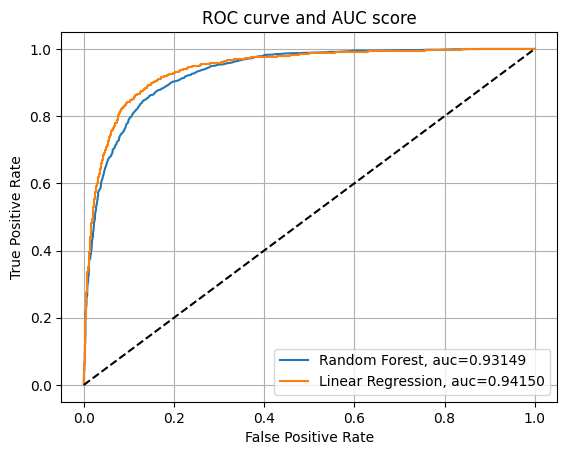

In [ ]:
roc_auc_plotter(X_test_imp, y_test, rf_model_imp, lr_model_imp)

**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 2.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/litvan007/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/litvan007/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Normalisation by lemmatizer**

In [ ]:
wnl = WordNetLemmatizer()
X_norm = X.apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))
X_train_norm = X_train.apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))
X_test_norm = X_test.apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))

**BOW with CountVectorizer + stopwords**

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_norm)
X_train_norm_0 = count_vectorizer.transform(X_train_norm)
X_test_norm_0 = count_vectorizer.transform(X_test_norm)

print(X_train_norm_0.shape, X_test_norm_0.shape)

(20000, 72747) (5000, 72747)


The shapes of the matrices have become smaller

**Reducing dimensionality with HashingVectorizer**

In [ ]:
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
hash_vectorizer.fit(X_norm)
X_train_norm_hash = hash_vectorizer.transform(X_train_norm)
X_test_norm_hash = hash_vectorizer.transform(X_test_norm)

print(X_train_norm_hash.shape, X_test_norm_hash.shape)

(20000, 15000) (5000, 15000)


In [ ]:
rf_model_norm_hash = RandomForestClassifier(n_estimators=500)
lr_model_norm_hash = LogisticRegression(max_iter=1e5)

rf_model_norm_hash.fit(X_train_norm_hash, y_train)
lr_model_norm_hash.fit(X_train_norm_hash, y_train)

LogisticRegression(max_iter=100000.0)

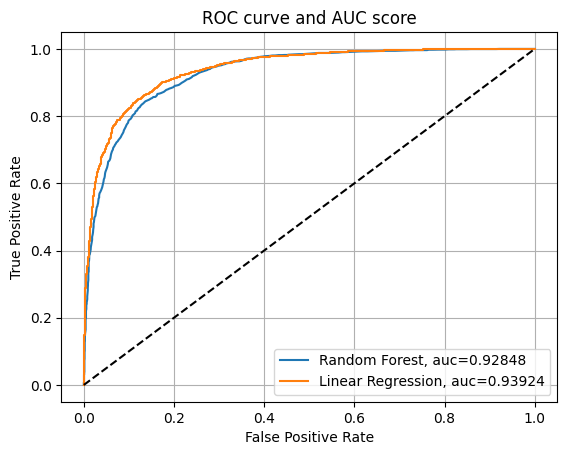

In [ ]:
roc_auc_plotter(X_test_norm_hash, y_test, rf_model_norm_hash, lr_model_norm_hash)

**ROC-AUC hasn't been improved**

## Part 2. Word Embeddings [7 points]

In [ ]:
import gensim.downloader

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [ ]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [ ]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.1 [1 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) cab be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs, etc.

In [ ]:
word_embeddings.most_similar(positive=['man'], negative=['girl'])

[('powerful', 0.4153137505054474),
 ('khalid', 0.4134496748447418),
 ('lorentz', 0.4125732481479645),
 ('penalty', 0.4010991156101227),
 ('chief', 0.3943879008293152),
 ('midfield', 0.394057035446167),
 ('scot', 0.3847907781600952),
 ('gen.', 0.38472047448158264),
 ('leading', 0.3845301568508148),
 ('invariant', 0.3822256624698639)]

In [ ]:
word_embeddings.most_similar(positive=['deal'])

[('agreement', 0.8613187670707703),
 ('agreed', 0.8007572889328003),
 ('deals', 0.7925132513046265),
 ('contract', 0.7913165092468262),
 ('negotiations', 0.7725955247879028),
 ('plan', 0.7587645053863525),
 ('proposal', 0.7552980184555054),
 ('would', 0.7420734167098999),
 ('talks', 0.7372696995735168),
 ('agreeing', 0.7329133749008179)]

In [ ]:
word_embeddings.most_similar(positive=['fast'], negative=['speed'])

[('afridi', 0.42396917939186096),
 ('shoaib', 0.4156780540943146),
 ('vegetarian', 0.4140893816947937),
 ('thriving', 0.410264253616333),
 ('grocery', 0.39187946915626526),
 ('bowled', 0.3885907828807831),
 ('tailender', 0.38510021567344666),
 ('trendy', 0.38479381799697876),
 ('grocer', 0.383355975151062),
 ('u.n.-declared', 0.3826706111431122)]

In [ ]:
word_embeddings.most_similar(positive=['yandex'], negative=['amazon'])

[('rotative', 0.5849406123161316),
 ('radisich', 0.5796140432357788),
 ('mollin', 0.575876772403717),
 ('lahham', 0.5743010640144348),
 ('sisti', 0.5701236128807068),
 ('cromie', 0.5697100758552551),
 ('lussi', 0.5694043040275574),
 ('arkadi', 0.5655577182769775),
 ('gulian', 0.5652709007263184),
 ('inma', 0.5652281045913696)]

**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [ ]:
from nltk import word_tokenize, pos_tag

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/litvan007/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/litvan007/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
X_tok = X.apply(lambda x: word_tokenize(x.lower()))
X_tok

0        [with, all, this, stuff, going, down, at, the,...
1        [\the, classic, war, of, the, worlds\, '', by,...
2        [the, film, starts, with, a, manager, (, nicho...
3        [it, must, be, assumed, that, those, who, prai...
4        [superbly, trashy, and, wondrously, unpretenti...
                               ...                        
24995    [it, seems, like, more, consideration, has, go...
24996    [i, do, n't, believe, they, made, this, film, ...
24997    [guy, is, a, loser, ., ca, n't, get, girls, ,,...
24998    [this, 30, minute, documentary, buñuel, made, ...
24999    [i, saw, this, movie, as, a, child, and, it, b...
Name: review, Length: 25000, dtype: object

In [ ]:
lst = []
for line in X_tok:
    for token in line:
        lst.append(token)

In [ ]:
POS_counts = Counter([t[1] for t in pos_tag(lst)])
POS_counts.most_common(10)

[('NN', 1299056),
 ('DT', 684936),
 ('IN', 669185),
 ('JJ', 581198),
 ('RB', 401788),
 ('NNP', 285108),
 (',', 275887),
 ('.', 273029),
 ('VBZ', 272596),
 ('NNS', 266435)]

* I'd train the model on each part of speech separately. Depending on the score obtained, I put the weights accordingly
* The maximum weight will be given to those parts of speech that gave the highest result during training

**Task 2.3 [4 points] - WordEmbeddings**

Use dense vector representations to construct vector-representation of each review, then train a model (LR or RF).

Compare results of the new model to results of the models above.

**Important**
- If you just sum embeddings of each token to get an embedding of the whole review, the cost of the task is **[2 points]**
- For **[4 points]** you have to use either TF-IDF weight or weights that you designed from POS tags.

In [22]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import umap

# model = Word2Vec(X_tok.to_list(), 
#                  vector_size=150,
#                  min_count=5,
#                  window=8).wv

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):

    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [ ]:
words = list(model.key_to_index.keys())
word_vectors = np.asarray([model[x] for x in words])
word_vectors.shape

(32723, 150)

In [ ]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=words)

figure(id='p1005', ...)

**review2vec + TF-IDF**

In [24]:
type(X)

pandas.core.series.Series

In [23]:
tf = TfidfVectorizer(analyzer='word', stop_words = 'english', max_features=150)
tfidf_matrix =  tf.fit(X.tolist())

tfidf_matrix_train = tf.transform(X_train.tolist())
tfidf_matrix_test = tf.transform(X_test.tolist())

In [ ]:
def get_review_embedding(tfidf_values, review):
    review_tok = word_tokenize(review)
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_vectors = [model[x] for x in review_tok if model.has_index_for(x)]
    n = len(phrase_vectors)
    if n != 0:
        for vec in phrase_vectors:
            w_vec = np.squeeze(np.array([vec_el*w for vec_el, w in zip(vec, tfidf_values.toarray())]))
            vector += w_vec
    return vector/n

In [ ]:
review_vectors_train = np.asarray([get_review_embedding(vec_tfidf[0], x) for vec_tfidf, x in zip(tfidf_matrix_train, X_train)])
review_vectors_test = np.asarray([get_review_embedding(vec_tfidf[0], x) for vec_tfidf, x in zip(tfidf_matrix_test, X_test)])

In [ ]:
rf_model_wv = RandomForestClassifier(n_estimators=500)
lr_model_wv = LogisticRegression(max_iter=1e5)

rf_model_wv.fit(review_vectors_train, y_train)
lr_model_wv.fit(review_vectors_train, y_train)

LogisticRegression(max_iter=100000.0)

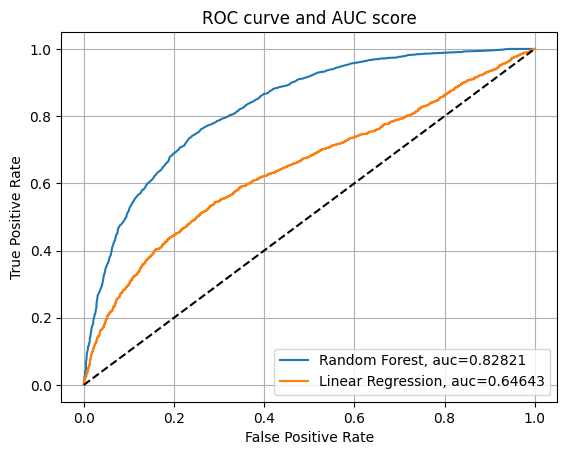

In [ ]:
roc_auc_plotter(review_vectors_test, y_test, rf_model_wv, lr_model_wv)

I think that we will obtian ROC-AUC score >= 0.9, if we find more suitable parameters for RF

# Visualizate train reviews with labels

In [ ]:
review_vectors_2d_train = umap.UMAP(n_neighbors=3).fit_transform(review_vectors_train)
colors_train = list(map(lambda x: 'red' if x == 0 else 'blue', y_train))

In [ ]:
draw_vectors(review_vectors_2d_train[::100, 0], review_vectors_2d_train[::100, 1], color=colors_train[::100],
             phrase=[phrase[:200] for phrase in X_train[::100]],
             radius=20,)

figure(id='p1155', ...)